#### DATA CLEANING PART OVERALL

In [228]:
# importing the libraries for data processing
import numpy as np 
import pandas as pd
import seaborn as sns


In [229]:
#IMPORTING CHARTS FROM CSVs
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
artist_df = pd.read_csv('data/spotify_daily_charts_artists.csv')
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')

In [230]:
#list comprehension to check elements of a list not in another list
complete_dates = pd.date_range(start='2017-01-01', end='2021-05-20', freq='D').strftime('%Y-%m-%d')
dataset_dates = pd.unique(charts_df['date'])

[p for p in complete_dates if p not in dataset_dates]

['2017-05-30', '2017-05-31', '2017-06-02']

In [231]:
#Check null values in the columns
charts_df[charts_df['artist'].isnull()]

,date,position,track_id,track_name,artist,streams
39406,2017-07-20,7,3RXkboS74UYzN14xTqzPyY,NaN,NaN,121541
39423,2017-07-20,24,3eFJqPe8VUYrABbFjSauuj,NaN,NaN,85374
39426,2017-07-20,27,4JAyIDXOqNM6qHuZML01uX,NaN,NaN,81223
39455,2017-07-20,56,3bVbQvGVIe4n24AzyXovXh,NaN,NaN,46754
39606,2017-07-21,7,3RXkboS74UYzN14xTqzPyY,NaN,NaN,120186
39621,2017-07-21,22,4JAyIDXOqNM6qHuZML01uX,NaN,NaN,92580
39628,2017-07-21,29,3eFJqPe8VUYrABbFjSauuj,NaN,NaN,83205
39690,2017-07-21,91,3bVbQvGVIe4n24AzyXovXh,NaN,NaN,35049
39902,2017-07-22,103,6Br5mChPdgQNmLF0G0gjPH,NaN,NaN,29422
40098,2017-07-23,99,6Br5mChPdgQNmLF0G0gjPH,NaN,NaN,28054


In [232]:
#Check for duplicates
sum(charts_df.duplicated())

0

In [233]:
#transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [234]:
#extract month 
charts_df['month']=charts_df['date'].dt.month
#extract year
charts_df['year']=charts_df['date'].dt.year
# get day and day of week
charts_df['day']=charts_df['date'].dt.day
charts_df['day_of_week']=charts_df['date'].dt.dayofweek # The day of the week with Monday=0, Sunday=6.
charts_df.head()

,date,position,track_id,track_name,artist,streams,month,year,day,day_of_week
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,1,2017,1,6
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,1,2017,1,6
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,1,2017,1,6
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,1,2017,1,6
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,1,2017,1,6


In [235]:
#merge charts dataframe with tracks dataframe
#follow charts_df's rows
df = charts_df.merge(tracks_df, on='track_id', how='left')
df.head()

,date,position,track_id,track_name_x,artist,streams,month,year,day,day_of_week,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,1,2017,1,6,...,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,1,2017,1,6,...,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,1,2017,1,6,...,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,1,2017,1,6,...,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,1,2017,1,6,...,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [236]:
#drop duplicated track_name column
df = df.drop(columns='track_name_y')
#rename trace_name x
df = df.rename(columns={'track_name_x':'track_name'})
df.head()

,date,position,track_id,track_name,artist,streams,month,year,day,day_of_week,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,1,2017,1,6,...,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,1,2017,1,6,...,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,1,2017,1,6,...,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,1,2017,1,6,...,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,1,2017,1,6,...,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [237]:
df.columns

Index(['date', 'position', 'track_id', 'track_name', 'artist', 'streams',
       'month', 'year', 'day', 'day_of_week', 'artist_id', 'artist_name',
       'album_id', 'duration', 'release_date', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [238]:
#merge charts dataframe with tracks dataframe
#follow charts_df's rows
df_overall = df.merge(artist_df, on='artist_id', how='left')
df_overall.head()

,date,position,track_id,track_name,artist,streams,month,year,day,day_of_week,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name_y,total_followers,genres,popularity_y
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,1,2017,1,6,...,0.0454,0.196,0.00000,0.0830,0.301,174.152,Bruno Mars,30585244,"['dance pop', 'pop']",95
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,1,2017,1,6,...,0.0590,0.695,0.00000,0.0902,0.494,85.043,James Arthur,8035001,"['pop', 'post-teen pop', 'talent show', 'uk pop']",87
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,1,2017,1,6,...,0.0338,0.414,0.00000,0.1110,0.661,95.010,The Chainsmokers,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",86
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,1,2017,1,6,...,0.0307,0.097,0.00272,0.1150,0.296,90.000,The Chainsmokers,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",86
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,1,2017,1,6,...,0.0800,0.338,0.00000,0.0975,0.447,100.048,Maroon 5,30759087,"['pop', 'pop rock']",92


In [239]:
df_overall.columns

Index(['date', 'position', 'track_id', 'track_name', 'artist', 'streams',
       'month', 'year', 'day', 'day_of_week', 'artist_id', 'artist_name_x',
       'album_id', 'duration', 'release_date', 'popularity_x', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'artist_name_y',
       'total_followers', 'genres', 'popularity_y'],
      dtype='object')

In [240]:
#renaming column names
df_overall = df_overall.rename(columns={'popularity_y':'artist_popularity'})
df_overall = df_overall.rename(columns={'popularity_x':'popularity'})
df_overall = df_overall.rename(columns={'artist_name_x':'artist_name'})
df_overall.head()

,date,position,track_id,track_name,artist,streams,month,year,day,day_of_week,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name_y,total_followers,genres,artist_popularity
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,1,2017,1,6,...,0.0454,0.196,0.00000,0.0830,0.301,174.152,Bruno Mars,30585244,"['dance pop', 'pop']",95
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,1,2017,1,6,...,0.0590,0.695,0.00000,0.0902,0.494,85.043,James Arthur,8035001,"['pop', 'post-teen pop', 'talent show', 'uk pop']",87
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,1,2017,1,6,...,0.0338,0.414,0.00000,0.1110,0.661,95.010,The Chainsmokers,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",86
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,1,2017,1,6,...,0.0307,0.097,0.00272,0.1150,0.296,90.000,The Chainsmokers,17865117,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",86
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,1,2017,1,6,...,0.0800,0.338,0.00000,0.0975,0.447,100.048,Maroon 5,30759087,"['pop', 'pop rock']",92


In [241]:
#comparing if there are changes in shape of df_overall and df
df_overall.shape

(319616, 31)

In [242]:
df.shape

(319600, 27)

In [243]:
#checking duplicates of df_overall
sum(df_overall.duplicated())

16

In [244]:
#dropping duplicate rows
df_overall=df_overall.drop_duplicates(keep="first")

In [245]:
#checking if shape is similar with df
df_overall.shape

(319600, 31)

In [246]:
#checking num values
df_overall.isnull().sum()

date                  0
position              0
track_id              0
track_name           10
artist               10
streams               0
month                 0
year                  0
day                   0
day_of_week           0
artist_id             0
artist_name          10
album_id              0
duration              0
release_date          0
popularity            0
danceability         63
energy               63
key                  63
loudness             63
mode                 63
speechiness          63
acousticness         63
instrumentalness     63
liveness             63
valence              63
tempo                63
artist_name_y         0
total_followers       0
genres                0
artist_popularity     0
dtype: int64

In [247]:
#creating df_overall for EDA analysis
df_overall=df_overall.dropna()

#### EDA PART FOR TOP STREAMED SONGS FOR 2017-2021

In [248]:
#creating dataframe for song attributes of charted guetta songs
df_guetta=overall_df[overall_df["artist"].str.contains("Guetta")]
df_guetta_songs=df_guetta.groupby(["track_name",'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo','genres'])["streams"].sum().reset_index()
df_guetta_songs

,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres,streams
0,2U (feat. Justin Bieber),69,0.548,0.650,8.0,-5.827,0.0,0.0591,0.21900,0.000000,0.2250,0.557,144.937,"['big room', 'dance pop', 'edm', 'pop', 'pop d...",12589050
1,Better When You're Gone,69,0.647,0.795,1.0,-3.548,0.0,0.0372,0.06350,0.000000,0.1880,0.409,127.992,"['big room', 'dance pop', 'edm', 'pop', 'pop d...",23222
2,Dirty Sexy Money (feat. Charli XCX & French Mo...,62,0.721,0.873,1.0,-4.741,1.0,0.1190,0.07890,0.000000,0.0824,0.552,79.943,"['big room', 'dance pop', 'edm', 'pop', 'pop d...",1947740
3,Don't Leave Me Alone (feat. Anne-Marie),56,0.694,0.617,4.0,-7.838,0.0,0.0469,0.17700,0.000000,0.1100,0.496,127.928,"['big room', 'dance pop', 'edm', 'pop', 'pop d...",5346031
4,Don't Leave Me Alone (feat. Anne-Marie),62,0.659,0.738,4.0,-5.072,0.0,0.0477,0.11800,0.000000,0.1150,0.481,127.950,"['big room', 'dance pop', 'edm', 'pop', 'pop d...",3006749
5,Flames,70,0.609,0.726,5.0,-4.346,0.0,0.0414,0.07230,0.000008,0.0895,0.362,93.958,"['big room', 'dance pop', 'edm', 'pop', 'pop d...",5150172
6,Light My Body Up (feat. Nicki Minaj & Lil Wayne),51,0.699,0.660,6.0,-7.013,0.0,0.0861,0.00365,0.000000,0.1390,0.689,145.937,"['big room', 'dance pop', 'edm', 'pop', 'pop d...",21507
7,Like I Do,68,0.635,0.900,0.0,-3.719,0.0,0.0377,0.00664,0.014500,0.3700,0.150,127.978,"['big room', 'dance pop', 'edm', 'pop', 'pop d...",2696045
8,Say My Name,74,0.703,0.660,10.0,-5.119,0.0,0.1230,0.13700,0.000000,0.1920,0.790,95.031,"['big room', 'dance pop', 'edm', 'pop', 'pop d...",559563


In [249]:
#creating dataframe for song attributes of Top 100 songs
df_songs=df_overall.groupby(["track_name",'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo','genres'])["streams"].sum().reset_index().sort_values("streams",ascending=False).head(100)
df_songs

,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres,streams
1474,Kathang Isip,70,0.491,0.314,10.0,-8.580,1.0,0.0301,0.7760,0.000005,0.1520,0.295,126.921,['opm'],137574061
1505,Kung 'Di Rin Lang Ikaw,66,0.502,0.482,4.0,-4.736,1.0,0.0288,0.1610,0.000000,0.1870,0.132,133.894,"['opm', 'pinoy pop punk']",124246178
1791,Maybe The Night,69,0.572,0.522,2.0,-9.095,1.0,0.0367,0.1130,0.000049,0.1140,0.498,74.050,['opm'],117216219
2405,Sana,67,0.660,0.373,7.0,-7.874,1.0,0.0290,0.7010,0.000000,0.2260,0.348,126.887,"['opm', 'pinoy indie', 'pinoy rock']",116625610
2446,Say You Won't Let Go,85,0.358,0.557,10.0,-7.398,1.0,0.0590,0.6950,0.000000,0.0902,0.494,85.043,"['pop', 'post-teen pop', 'talent show', 'uk pop']",115333908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,Hanggang Kailan,55,0.404,0.174,9.0,-10.192,1.0,0.0312,0.8930,0.000000,0.0977,0.324,87.636,['opm'],35319070
280,Bakit Ba Ikaw,61,0.668,0.480,10.0,-5.469,1.0,0.0284,0.5490,0.000000,0.1120,0.277,119.903,['opm'],35302747
2778,The Day You Said Goodnight,65,0.558,0.553,4.0,-6.669,1.0,0.0323,0.4920,0.000000,0.1160,0.251,134.263,"['opm', 'pinoy reggae', 'pinoy rock']",35170954
3139,Without Me,81,0.752,0.488,6.0,-7.050,1.0,0.0705,0.2970,0.000009,0.0936,0.533,136.041,"['dance pop', 'electropop', 'etherpop', 'indie...",34946726


D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


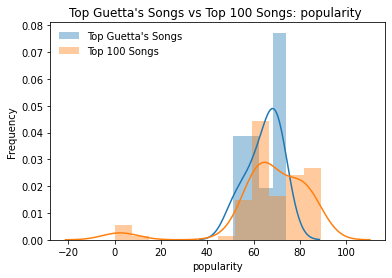

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


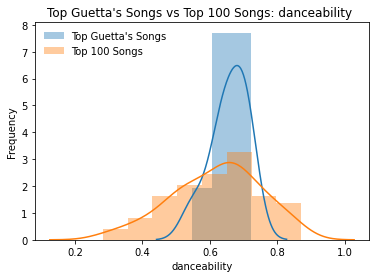

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


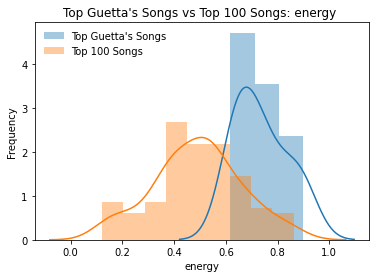

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


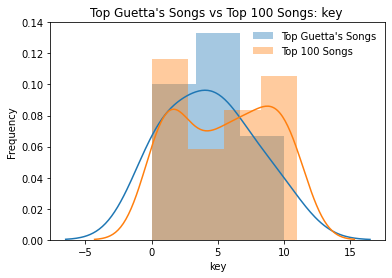

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


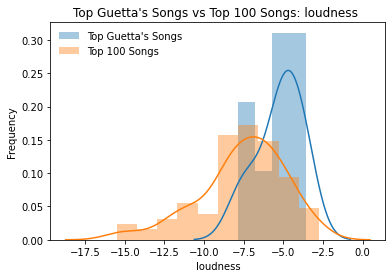

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


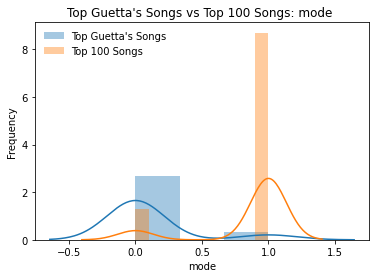

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


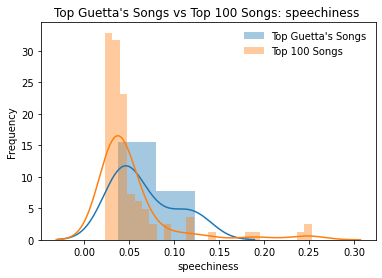

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


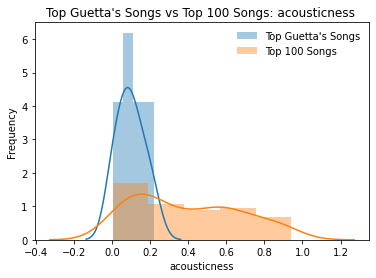

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


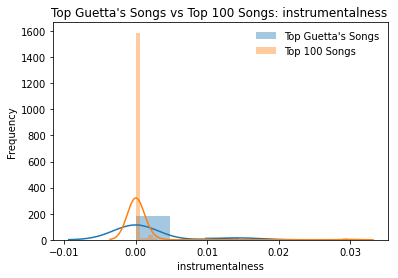

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


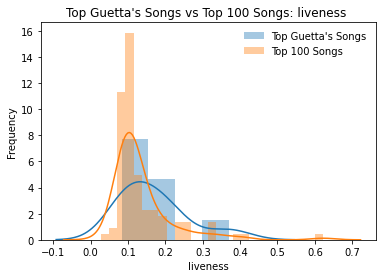

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


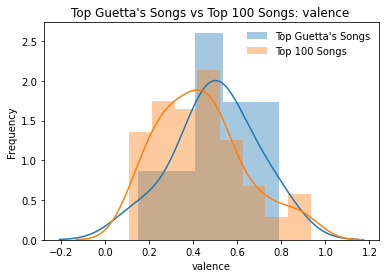

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


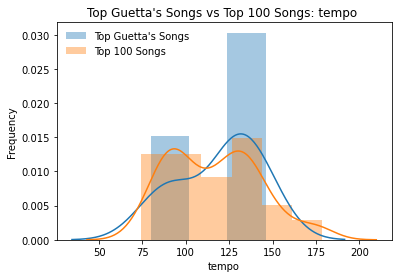

In [250]:
#creating histograms for song attributes comparison for top 100 songs vs Guetta songs

for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    KEYWORD1="Top Guetta's Songs"
    KEYWORD2="Top 100 Songs"
    fig,ax = plt.subplots()
    
    sns.distplot(df_guetta_songs[col], ax=ax, label= KEYWORD1)
    sns.distplot(df_songs[col], ax=ax, label= KEYWORD2)
    plt.title("%s vs %s: %s " % (KEYWORD1,KEYWORD2,col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()


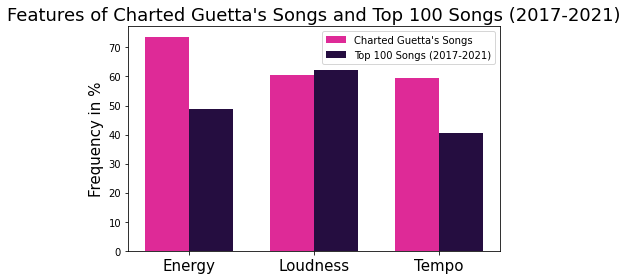

In [251]:
#CREATING BAR GRAPHS

tracks1_df=df_guetta_songs
tracks2_df=df_songs
#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

tracks1_df['loudness'] = scaler.fit_transform(tracks1_df[['loudness']])
tracks1_df['tempo'] =  scaler.fit_transform(tracks1_df[['tempo']])
tracks2_df['loudness'] = scaler.fit_transform(tracks2_df[['loudness']])
tracks2_df['tempo'] =  scaler.fit_transform(tracks2_df[['tempo']])


set1_means = []
set2_means = []

for col in ['energy', 'loudness', 'tempo']:
    
    set1_means.append(tracks1_df[col].mean()*100)
    set2_means.append(tracks2_df[col].mean()*100)

labels = ['Energy', 'Loudness', 'Tempo']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, set1_means, width, label="Charted Guetta's Songs", color ="#DE2A97" )
rects2 = ax.bar(x + width/2, set2_means, width, label='Top 100 Songs (2017-2021)', color ="#250D40")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency in %',fontsize=15)
ax.set_title("Features of Charted Guetta's Songs and Top 100 Songs (2017-2021)", fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 0, fontsize=15)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

#### EDA FOR TOP 10 STREAMED ARTISTS FROM 2017-2021

In [252]:
#determining top 10 streamed artists
df_guetta_songs=df_guetta.groupby(["track_name",'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo','genres'])["streams"].sum().reset_index()
top_artist=df_overall.groupby("artist")["streams"].sum().sort_values(ascending=False).to_frame().head(10).reset_index()
top_artist

,artist,streams
0,Ben&Ben,637518801
1,Ed Sheeran,480456420
2,December Avenue,438907047
3,LANY,438613851
4,Moira Dela Torre,397559815
5,Ariana Grande,336398767
6,Lauv,314199497
7,Taylor Swift,284292248
8,Maroon 5,282490178
9,BLACKPINK,279117018


In [253]:
#creating dataframe for song attributes of Top 10 artists' songs
df_artist=df_overall[df_overall["artist"].isin(list(top_artist["artist"]))]

df_artist.groupby(["track_name",'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo','genres'])["streams"].sum().reset_index()

,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres,streams
0,(what i wish just one person would say to me),28,0.244,0.662,8.0,-7.161,1.0,0.0487,0.05980,0.000011,0.0588,0.254,172.011,"['la pop', 'pop', 'post-teen pop']",275269
1,...Ready For It?,0,0.613,0.764,2.0,-6.509,1.0,0.1360,0.05270,0.000000,0.1970,0.417,160.015,"['pop', 'post-teen pop']",33599
2,...Ready For It?,0,0.615,0.779,2.0,-6.454,1.0,0.1350,0.06650,0.000000,0.1550,0.453,160.000,"['pop', 'post-teen pop']",688426
3,...Ready For It?,0,0.616,0.770,2.0,-6.500,1.0,0.1420,0.05730,0.000000,0.1590,0.412,160.049,"['pop', 'post-teen pop']",3304228
4,...Ready For It?,73,0.613,0.764,2.0,-6.509,1.0,0.1360,0.05270,0.000000,0.1970,0.417,160.015,"['pop', 'post-teen pop']",826157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,worst behavior,68,0.726,0.667,5.0,-5.956,0.0,0.0617,0.37000,0.000000,0.1180,0.434,100.053,"['dance pop', 'pop', 'post-teen pop']",34366
512,you!,6,0.500,0.635,10.0,-7.530,1.0,0.0253,0.00648,0.005080,0.1260,0.276,94.000,"['la pop', 'pop', 'post-teen pop']",4133939
513,you!,36,0.500,0.635,10.0,-7.530,1.0,0.0253,0.00648,0.005080,0.1260,0.276,94.000,"['la pop', 'pop', 'post-teen pop']",6439267
514,‘tis the damn season,58,0.575,0.435,5.0,-8.193,1.0,0.0311,0.73700,0.000054,0.1050,0.351,145.910,"['pop', 'post-teen pop']",1144037


D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


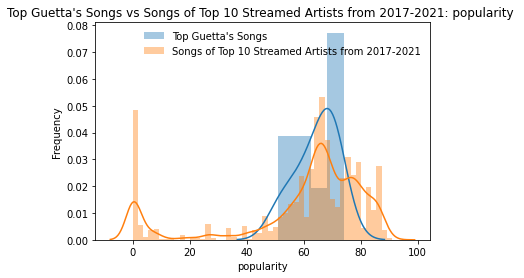

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


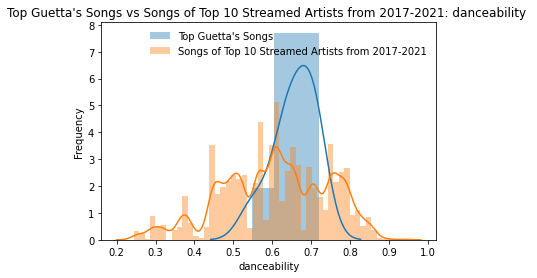

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


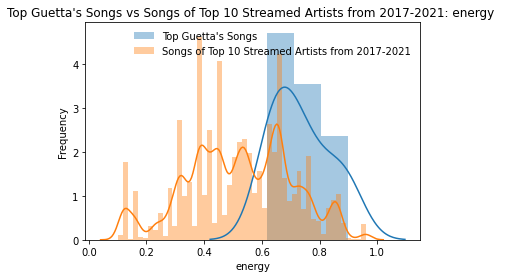

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


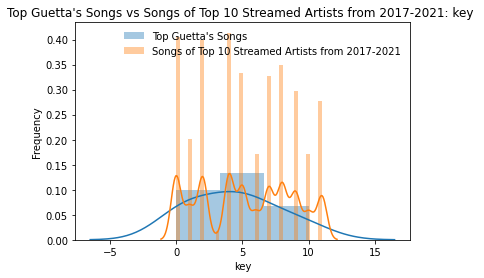

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


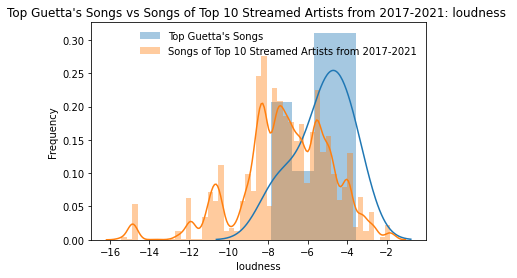

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


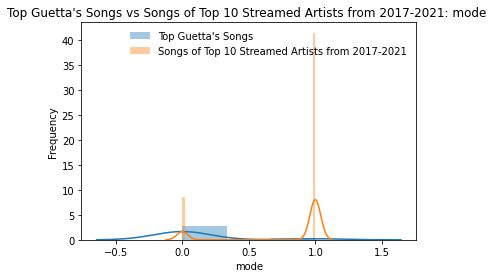

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


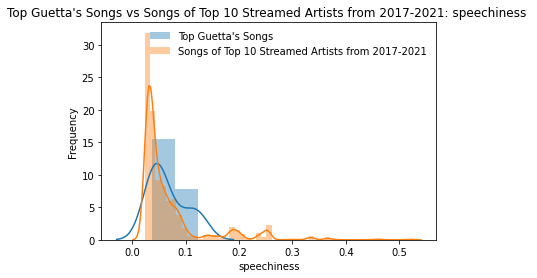

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


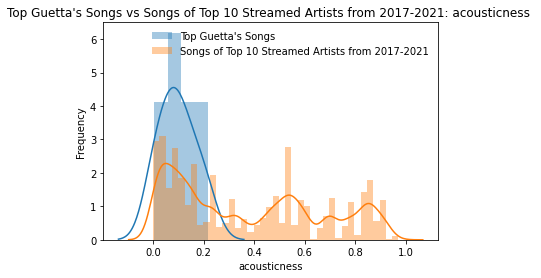

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


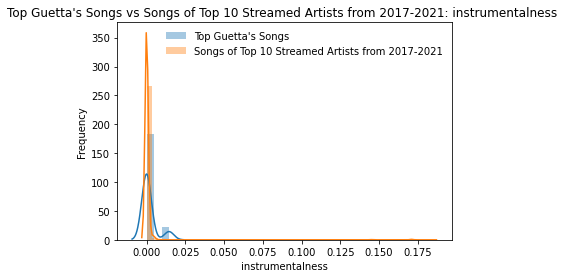

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


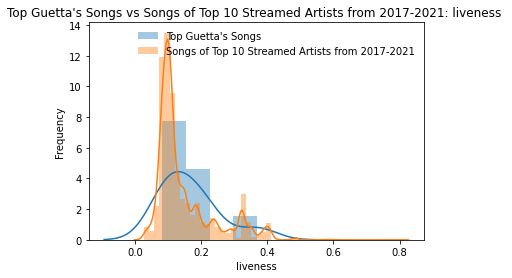

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


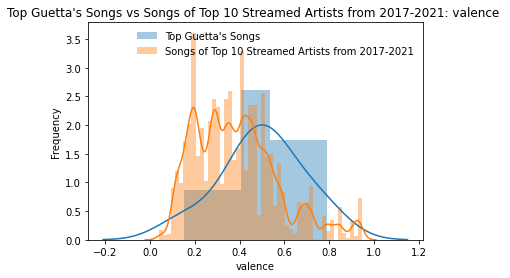

D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Games\Anaconda\envs\eskwelabs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


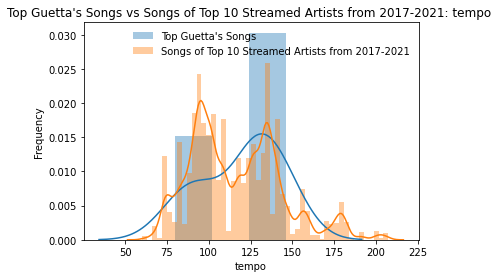

In [254]:
#creating histograms for song attributes comparison for top 10 Aritsts vs Guetta songs
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    KEYWORD1="Top Guetta's Songs"
    KEYWORD2="Songs of Top 10 Streamed Artists from 2017-2021"
    fig,ax = plt.subplots()
    
    sns.distplot(df_guetta_songs[col], ax=ax, label= KEYWORD1)
    sns.distplot(df_artist[col], ax=ax, label= KEYWORD2)
    plt.title("%s vs %s: %s " % (KEYWORD1,KEYWORD2,col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()


<ipython-input-255-b93bf68a8797>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks2_df['loudness'] = scaler.fit_transform(tracks2_df[['loudness']])
<ipython-input-255-b93bf68a8797>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks2_df['tempo'] =  scaler.fit_transform(tracks2_df[['tempo']])


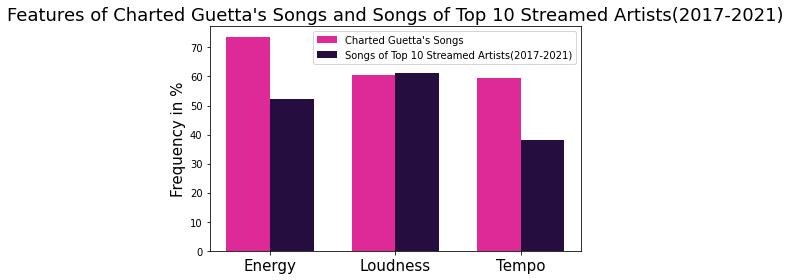

In [255]:
#BAR GRAPHS FOR TO 10 ARTISTS VS GUETTA SONGS

tracks1_df=df_guetta_songs
tracks2_df=df_artist
#Normalize
scaler = MinMaxScaler()

tracks1_df['loudness'] = scaler.fit_transform(tracks1_df[['loudness']])
tracks1_df['tempo'] =  scaler.fit_transform(tracks1_df[['tempo']])
tracks2_df['loudness'] = scaler.fit_transform(tracks2_df[['loudness']])
tracks2_df['tempo'] =  scaler.fit_transform(tracks2_df[['tempo']])


set1_means = []
set2_means = []

for col in ['energy', 'loudness', 'tempo']:
    
    set1_means.append(tracks1_df[col].mean()*100)
    set2_means.append(tracks2_df[col].mean()*100)

labels = ['Energy', 'Loudness', 'Tempo']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, set1_means, width, label="Charted Guetta's Songs", color ="#DE2A97" )
rects2 = ax.bar(x + width/2, set2_means, width, label='Songs of Top 10 Streamed Artists(2017-2021)', color ="#250D40")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency in %',fontsize=15)
ax.set_title("Features of Charted Guetta's Songs and Songs of Top 10 Streamed Artists(2017-2021)", fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 0, fontsize=15)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()